In [62]:
import os


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, load_img, img_to_array 

# Data

- Load the dataset. The _image_dataset_from_directory_ function makes it easier to do this task since classes are distributed between 3 folders (one for each class).
- We'll set label_mode to categorical and also shuffle the batches (by default with 32 observations) for a better generalization later.
- For now image size will not be changed.

In [63]:
data_dir = "../data"

- There isn't a lot of difference between total amount of observations of each label. Hence, balancing the dataset at first isn't necessary.
- Also there are no corrupted files so we can move on without worrying about invalid observations.

In [69]:
print("Number of observations")
print("-"*10)
print(" ")
shapes_list = []
for label in os.listdir(data_dir):
   label_folder = data_dir+"/"+label
   image_paths = os.listdir(label_folder)
   print(label + ": " + str(len(image_paths)))
   shapes_per_label = []
   for path in image_paths:
      img_path = label_folder+"/"+path
      try:
         img = Image.open(img_path)
         # append shape
         shapes_per_label.append((img.width, img.height))
         
         # check integrity
         img.verify()
      except Exception as e:
         print(f"corrupted: {path}")
   shapes_list.append(shapes_per_label)

Number of observations
----------
 
paper: 712
rock: 726
scissors: 750


- Shape of images is correct and there's no images of different shapes

In [72]:
[set(x) for x in shapes_list]

[{(300, 200)}, {(300, 200)}, {(300, 200)}]

- Loading the data

In [33]:
# standard batch size 32, shuffle for better generalization

original_size = (300,200)
full_dataset = image_dataset_from_directory(
    data_dir,
    image_size=original_size,
    label_mode="categorical",
    shuffle=True,
    seed=42
)

class_names = full_dataset.class_names

Found 2188 files belonging to 3 classes.


In [42]:
full_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

# Exploration of the dataset
- What are we dealing with? as we can see, we are presented with many images of hand gestures.
- From a general check we can say that:
    - All images apparently are horizontally oriented with hands showing from the right side of the frame.

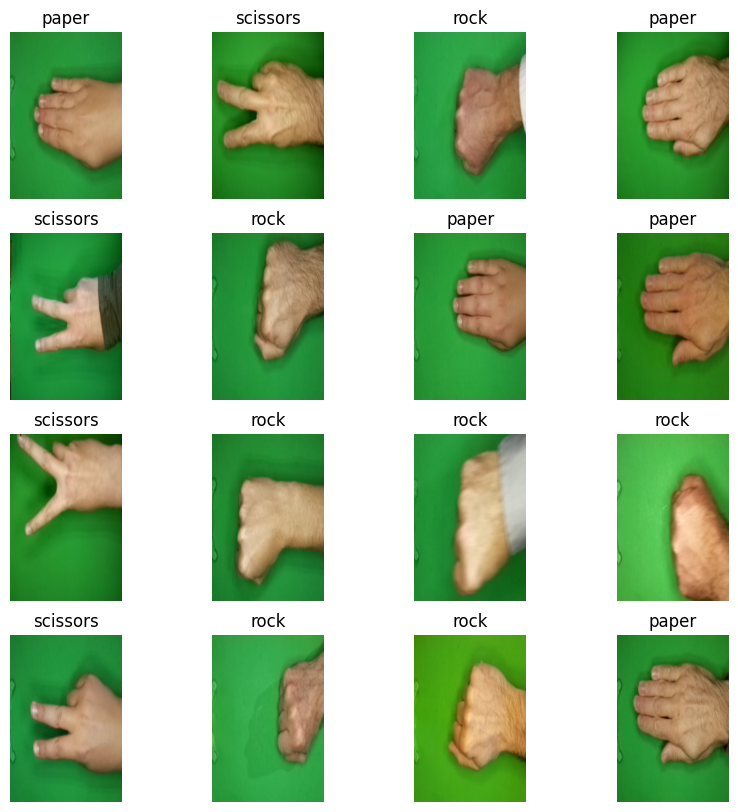

In [107]:
for images, labels in full_dataset.take(1):
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        plt.title(class_names[np.argmax(labels[i].numpy())])
        plt.axis("off")

- Although mainly coming from the right side, we can also see that some hands come with an angle, being a bit upper or lower from the right side.

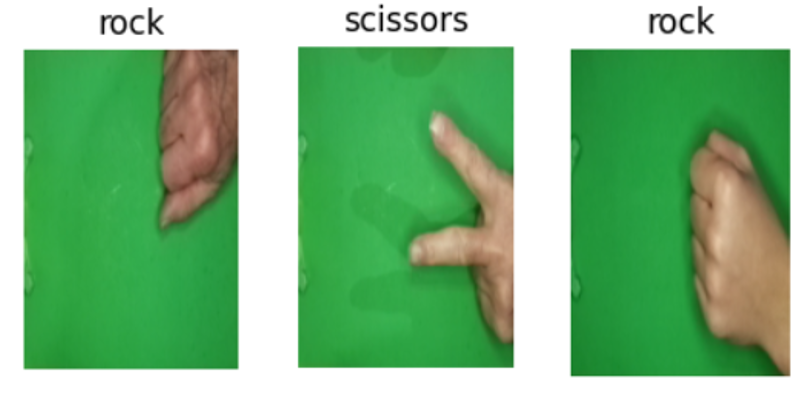

- Some of the pictures are not fully centered and the gestures do not fully cover the photo frame.

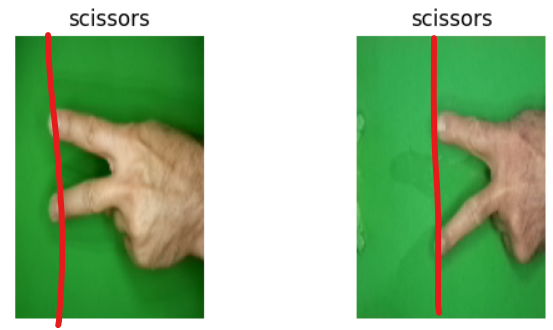

- Mix of people using right/left hand. Also, different ways of the same gesture (especially for scissors and papers)

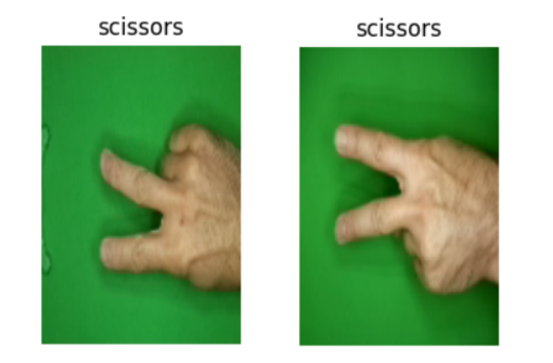

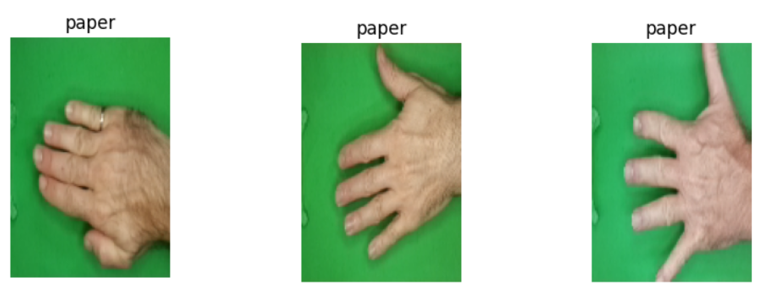

- There are hands with visible sleeves and also accesories like rings.

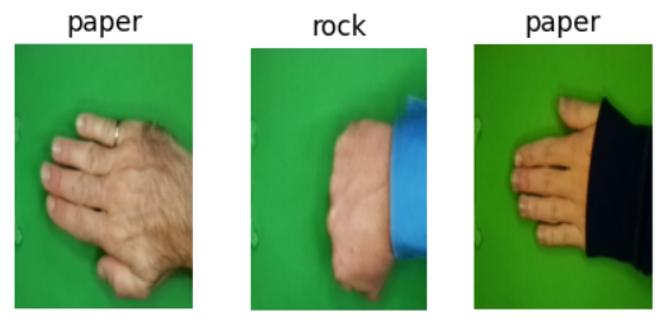